# Data Cleaning

Test that the recipes dataset is loaded into the catalog, and apply some basic data cleaning steps:

1. Drop unnecessary columns and preserve the index as a separate column.
2. Split the dataset into two separate dataframes:
    1. `recipe_instructions`: contains the title and instructions for each recipe
    2. `recipe_ingredients`: contains the cleaned ingredients for each recipe
3. Reverse the process and split the string into a list of strings.
4. Explode the list of ingredients into separate rows.
5. Remove leading and trailing whitespace from all entries.
6. Remove rows containing str artefacts from the string split operation upstream.

In [2]:
%load_ext kedro.ipython

[11/03/25 02:52:00] INFO     Using                                                                  ]8;id=226800;file:///Users/benlee/miniconda3/envs/sous-chef/lib/python3.12/site-packages/kedro/framework/project/__init__.py\__init__.py]8;;\:]8;id=450090;file:///Users/benlee/miniconda3/envs/sous-chef/lib/python3.12/site-packages/kedro/framework/project/__init__.py#270\270]8;;\
                             '/Users/benlee/miniconda3/envs/sous-chef/lib/python3.12/site-packages/                
                             kedro/framework/project/rich_logging.yml' as logging configuration.                   

                    INFO     Registered line magic '%reload_kedro'                                   ]8;id=738940;file:///Users/benlee/miniconda3/envs/sous-chef/lib/python3.12/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=36464;file:///Users/benlee/miniconda3/envs/sous-chef/lib/python3.12/site-packages/kedro/ipython/__init__.py#63\63]8;;\

                    INFO     Registered line magic '%load_node'                                      ]8;id=396418;file:///Users/benlee/miniconda3/envs/sous-chef/lib/python3.12/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=589044;file:///Users/benlee/miniconda3/envs/sous-chef/lib/python3.12/site-packages/kedro/ipython/__init__.py#65\65]8;;\

                    INFO     Resolved project path as: /Users/benlee/Workspace/sous-chef-ds.        ]8;id=316337;file:///Users/benlee/miniconda3/envs/sous-chef/lib/python3.12/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=59994;file:///Users/benlee/miniconda3/envs/sous-chef/lib/python3.12/site-packages/kedro/ipython/__init__.py#180\180]8;;\
                             To set a different path, run '%reload_kedro <project_root>'                           

[11/03/25 02:52:01] INFO     Kedro is sending anonymous usage data with the sole purpose of improving ]8;id=851902;file:///Users/benlee/miniconda3/envs/sous-chef/lib/python3.12/site-packages/kedro_telemetry/plugin.py\plugin.py]8;;\:]8;id=218694;file:///Users/benlee/miniconda3/envs/sous-chef/lib/python3.12/site-packages/kedro_telemetry/plugin.py#243\243]8;;\
                             the product. No personal data or IP addresses are stored on our side. To              
                             opt out, set the `KEDRO_DISABLE_TELEMETRY` or `DO_NOT_TRACK` environment              
                             variables, or create a `.telemetry` file in the current working                       
                             directory with the contents `consent: false`. To hide this message,                   
                             explicitly grant or deny consent. Read more at                                        
                             https://docs.kedro.org/en/stable/configuration/telemetry.html                         

                    INFO     Kedro project sous-chef-ds                                             ]8;id=633872;file:///Users/benlee/miniconda3/envs/sous-chef/lib/python3.12/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=790965;file:///Users/benlee/miniconda3/envs/sous-chef/lib/python3.12/site-packages/kedro/ipython/__init__.py#146\146]8;;\

                    INFO     Defined global variable 'context', 'session', 'catalog' and            ]8;id=304313;file:///Users/benlee/miniconda3/envs/sous-chef/lib/python3.12/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=86717;file:///Users/benlee/miniconda3/envs/sous-chef/lib/python3.12/site-packages/kedro/ipython/__init__.py#147\147]8;;\
                             'pipelines'                                                                           

[11/03/25 02:52:02] INFO     Registered line magic 'run_viz'                                        ]8;id=684730;file:///Users/benlee/miniconda3/envs/sous-chef/lib/python3.12/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=751902;file:///Users/benlee/miniconda3/envs/sous-chef/lib/python3.12/site-packages/kedro/ipython/__init__.py#153\153]8;;\

In [5]:
%reload_kedro

[11/03/25 02:53:04] INFO     Resolved project path as: /Users/benlee/Workspace/sous-chef-ds.        ]8;id=649617;file:///Users/benlee/miniconda3/envs/sous-chef/lib/python3.12/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=318921;file:///Users/benlee/miniconda3/envs/sous-chef/lib/python3.12/site-packages/kedro/ipython/__init__.py#180\180]8;;\
                             To set a different path, run '%reload_kedro <project_root>'                           

                    INFO     Kedro is sending anonymous usage data with the sole purpose of improving ]8;id=791018;file:///Users/benlee/miniconda3/envs/sous-chef/lib/python3.12/site-packages/kedro_telemetry/plugin.py\plugin.py]8;;\:]8;id=177380;file:///Users/benlee/miniconda3/envs/sous-chef/lib/python3.12/site-packages/kedro_telemetry/plugin.py#243\243]8;;\
                             the product. No personal data or IP addresses are stored on our side. To              
                             opt out, set the `KEDRO_DISABLE_TELEMETRY` or `DO_NOT_TRACK` environment              
                             variables, or create a `.telemetry` file in the current working                       
                             directory with the contents `consent: false`. To hide this message,                   
                             explicitly grant or deny consent. Read more at                                        
                             https://docs.kedro.org/en/stable/configuration/telemetry.html                         

                    INFO     Kedro project sous-chef-ds                                             ]8;id=505819;file:///Users/benlee/miniconda3/envs/sous-chef/lib/python3.12/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=364061;file:///Users/benlee/miniconda3/envs/sous-chef/lib/python3.12/site-packages/kedro/ipython/__init__.py#146\146]8;;\

                    INFO     Defined global variable 'context', 'session', 'catalog' and            ]8;id=357077;file:///Users/benlee/miniconda3/envs/sous-chef/lib/python3.12/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=934166;file:///Users/benlee/miniconda3/envs/sous-chef/lib/python3.12/site-packages/kedro/ipython/__init__.py#147\147]8;;\
                             'pipelines'                                                                           

                    INFO     Registered line magic 'run_viz'                                        ]8;id=477698;file:///Users/benlee/miniconda3/envs/sous-chef/lib/python3.12/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=107799;file:///Users/benlee/miniconda3/envs/sous-chef/lib/python3.12/site-packages/kedro/ipython/__init__.py#153\153]8;;\

In [12]:
import pandas as pd

## Load dataset

In [46]:
recipes = catalog.load('recipes')
images = catalog.load('recipe_images')

[11/03/25 04:33:26] INFO     Loading data from recipes (CSVDataset)...                         ]8;id=711024;file:///Users/benlee/miniconda3/envs/sous-chef/lib/python3.12/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=732100;file:///Users/benlee/miniconda3/envs/sous-chef/lib/python3.12/site-packages/kedro/io/data_catalog.py#1046\1046]8;;\

                    INFO     Loading data from recipe_images (PartitionedDataset)...           ]8;id=901111;file:///Users/benlee/miniconda3/envs/sous-chef/lib/python3.12/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=727924;file:///Users/benlee/miniconda3/envs/sous-chef/lib/python3.12/site-packages/kedro/io/data_catalog.py#1046\1046]8;;\

In [47]:
recipes.head()

,Title,Ingredients,Instructions,Image_Name,Cleaned_Ingredients
0,Miso-Butter Roast Chicken With Acorn Squash Pa...,"['1 (3½–4-lb.) whole chicken', '2¾ tsp. kosher...","Pat chicken dry with paper towels, season all ...",miso-butter-roast-chicken-acorn-squash-panzanella,"['1 (3½–4-lb.) whole chicken', '2¾ tsp. kosher..."
1,Crispy Salt and Pepper Potatoes,"['2 large egg whites', '1 pound new potatoes (...",Preheat oven to 400°F and line a rimmed baking...,crispy-salt-and-pepper-potatoes-dan-kluger,"['2 large egg whites', '1 pound new potatoes (..."
2,Thanksgiving Mac and Cheese,"['1 cup evaporated milk', '1 cup whole milk', ...",Place a rack in middle of oven; preheat to 400...,thanksgiving-mac-and-cheese-erick-williams,"['1 cup evaporated milk', '1 cup whole milk', ..."
3,Italian Sausage and Bread Stuffing,"['1 (¾- to 1-pound) round Italian loaf, cut in...",Preheat oven to 350°F with rack in middle. Gen...,italian-sausage-and-bread-stuffing-240559,"['1 (¾- to 1-pound) round Italian loaf, cut in..."
4,Newton's Law,"['1 teaspoon dark brown sugar', '1 teaspoon ho...",Stir together brown sugar and hot water in a c...,newtons-law-apple-bourbon-cocktail,"['1 teaspoon dark brown sugar', '1 teaspoon ho..."


## Data Transformation Steps

Drop unnecessary columns and preserve the index as a separate column.

In [9]:
recipes_df = recipes[['Title', 'Instructions', 'Cleaned_Ingredients', 'Image_Name']].reset_index(drop=False)

Split the dataset into two separate dataframes:

1. `recipe_instructions`: contains the title and instructions for each recipe
2. `recipe_ingredients`: contains the cleaned ingredients for each recipe

This makes it easier to work with the ingredients data which needs to be parsed and exploded.

In [20]:
def normalise_recipe_df(recipes_df:pd.DataFrame):
    recipe_instructions = recipes_df[['index', 'Title', 'Instructions']]
    recipe_ingredients = recipes_df[['index', 'Cleaned_Ingredients']].rename(
        columns={'index' : 'recipes_index', 'Cleaned_Ingredients' : 'ingredients'}
    )
    recipe_image = recipes_df[['index', 'Image_Name']]
    return recipe_instructions, recipe_ingredients, recipe_image

recipe_instructions, recipe_ingredients, recipe_image = normalise_recipe_df(recipes_df)

In [21]:
def normalise_recipe_image_name(recipe_image:pd.DataFrame):
    recipe_image.loc[:, 'Image_Name'] = recipe_image['Image_Name'].str.cat(
        ['jpg'] * len(recipe_image),
        sep='.'
    )
    return recipe_image

recipe_image = normalise_recipe_image_name(recipe_image)

recipe_image.head()

,index,Image_Name
0,0,miso-butter-roast-chicken-acorn-squash-panzane...
1,1,crispy-salt-and-pepper-potatoes-dan-kluger.jpg
2,2,thanksgiving-mac-and-cheese-erick-williams.jpg
3,3,italian-sausage-and-bread-stuffing-240559.jpg
4,4,newtons-law-apple-bourbon-cocktail.jpg


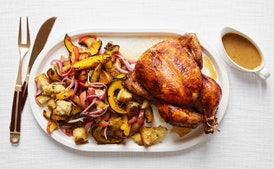

In [25]:
images[recipe_image.iloc[0, 1]]()

Ingredients are stored as a string, but its contents are a list of strings.

We reverse the process and split the string into a list of strings.

This step creates a list of strings, containing the ingredients but also some string artefacts like empty strings and stray commas that need to be removed.

In [89]:
def ingredients_str_to_list(ingredients_series:pd.Series):
    return (
        ingredients_series.str.replace('[', '')
        .str.replace(']', '')
        .str.split("\\'")
    )

recipe_ingredients['ingredients'] = ingredients_str_to_list(recipe_ingredients['ingredients'])

We explode the list of ingredients into separate rows, which makes it easier to filter out the artefacts.

In [104]:
def get_exploded_ingredients_per_recipe_index(recipe_ingredients:pd.DataFrame):
    # explode the list of ingredients into separate rows
    exploded_ingredients_per_recipe = recipe_ingredients.explode('ingredients')

    # remove leading and trailing whitespace from all entries
    exploded_ingredients_per_recipe.loc[:, 'ingredients'] = exploded_ingredients_per_recipe['ingredients'].str.strip()

    # remove rows containing str artefacts from the string split operation upstream
    empty_str_mask = exploded_ingredients_per_recipe['ingredients'] == ""
    comma_only_mask = exploded_ingredients_per_recipe['ingredients'] == ","
    exploded_ingredients_per_recipe = exploded_ingredients_per_recipe[~empty_str_mask & ~comma_only_mask]

    return exploded_ingredients_per_recipe

ingredients_per_recipe = get_exploded_ingredients_per_recipe_index(recipe_ingredients)
ingredients_per_recipe.reset_index(drop=True).reset_index(drop=False)

,index,recipes_index,ingredients
0,0,0,1 (3½–4-lb.) whole chicken
1,1,0,"2¾ tsp. kosher salt, divided, plus more"
2,2,0,2 small acorn squash (about 3 lb. total)
3,3,0,2 Tbsp. finely chopped sage
4,4,0,1 Tbsp. finely chopped rosemary
...,...,...,...
148307,148307,13500,3 tablespoons olive oil
148308,148308,13500,"6 (6-inch) corn tortillas, halved"
148309,148309,13500,"1 cup cooked black beans, rinsed and drained i..."
148310,148310,13500,Garnish: toasted pine nuts


In [107]:
print(f"Total number of recipes: {len(recipes)}")

Total number of recipes: 13501


## Pipeline Validation

We've plumbed the data through the pipeline, manually check the results (cba to write unit tests yet).

In [48]:
%%bash

kedro run --pipeline=data_transformation

[11/03/25 04:34:26] INFO     Using                               ]8;id=842930;file:///Users/benlee/miniconda3/envs/sous-chef/lib/python3.12/site-packages/kedro/framework/project/__init__.py\__init__.py]8;;\:]8;id=354920;file:///Users/benlee/miniconda3/envs/sous-chef/lib/python3.12/site-packages/kedro/framework/project/__init__.py#270\270]8;;\
                             '/Users/benlee/miniconda3/envs/sous                
                             -chef/lib/python3.12/site-packages/                
                             kedro/framework/project/rich_loggin                
                             g.yml' as logging configuration.                   
[11/03/25 04:34:26] INFO     Kedro project sous-chef-ds           ]8;id=402653;file:///Users/benlee/miniconda3/envs/sous-chef/lib/python3.12/site-packages/kedro/framework/session/session.py\session.py]8;;\:]8;id=942678;file:///Users/benlee/miniconda3/envs/sous-chef/lib/python3.12/site-packages/kedro/framework/session

In [49]:
%reload_kedro

[11/03/25 04:34:48] INFO     Resolved project path as: /Users/benlee/Workspace/sous-chef-ds.        ]8;id=715063;file:///Users/benlee/miniconda3/envs/sous-chef/lib/python3.12/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=843734;file:///Users/benlee/miniconda3/envs/sous-chef/lib/python3.12/site-packages/kedro/ipython/__init__.py#180\180]8;;\
                             To set a different path, run '%reload_kedro <project_root>'                           

                    INFO     Kedro is sending anonymous usage data with the sole purpose of improving ]8;id=587394;file:///Users/benlee/miniconda3/envs/sous-chef/lib/python3.12/site-packages/kedro_telemetry/plugin.py\plugin.py]8;;\:]8;id=908893;file:///Users/benlee/miniconda3/envs/sous-chef/lib/python3.12/site-packages/kedro_telemetry/plugin.py#243\243]8;;\
                             the product. No personal data or IP addresses are stored on our side. To              
                             opt out, set the `KEDRO_DISABLE_TELEMETRY` or `DO_NOT_TRACK` environment              
                             variables, or create a `.telemetry` file in the current working                       
                             directory with the contents `consent: false`. To hide this message,                   
                             explicitly grant or deny consent. Read more at                                        
                             https://docs.kedro.org/en/stable/configuration/telemetry.html                         

                    INFO     Kedro project sous-chef-ds                                             ]8;id=954836;file:///Users/benlee/miniconda3/envs/sous-chef/lib/python3.12/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=52212;file:///Users/benlee/miniconda3/envs/sous-chef/lib/python3.12/site-packages/kedro/ipython/__init__.py#146\146]8;;\

                    INFO     Defined global variable 'context', 'session', 'catalog' and            ]8;id=209870;file:///Users/benlee/miniconda3/envs/sous-chef/lib/python3.12/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=920921;file:///Users/benlee/miniconda3/envs/sous-chef/lib/python3.12/site-packages/kedro/ipython/__init__.py#147\147]8;;\
                             'pipelines'                                                                           

                    INFO     Registered line magic 'run_viz'                                        ]8;id=474583;file:///Users/benlee/miniconda3/envs/sous-chef/lib/python3.12/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=83357;file:///Users/benlee/miniconda3/envs/sous-chef/lib/python3.12/site-packages/kedro/ipython/__init__.py#153\153]8;;\

In [51]:
recipe_image = catalog.load('recipe_image')
recipe_ingredients = catalog.load('recipe_ingredients')
recipe = catalog.load('recipe')

[11/03/25 04:35:20] INFO     Loading data from recipe_image (ParquetDataset)...                ]8;id=559123;file:///Users/benlee/miniconda3/envs/sous-chef/lib/python3.12/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=79369;file:///Users/benlee/miniconda3/envs/sous-chef/lib/python3.12/site-packages/kedro/io/data_catalog.py#1046\1046]8;;\

                    INFO     Loading data from recipe_ingredients (ParquetDataset)...          ]8;id=584319;file:///Users/benlee/miniconda3/envs/sous-chef/lib/python3.12/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=396308;file:///Users/benlee/miniconda3/envs/sous-chef/lib/python3.12/site-packages/kedro/io/data_catalog.py#1046\1046]8;;\

                    INFO     Loading data from recipe (ParquetDataset)...                      ]8;id=590160;file:///Users/benlee/miniconda3/envs/sous-chef/lib/python3.12/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=535082;file:///Users/benlee/miniconda3/envs/sous-chef/lib/python3.12/site-packages/kedro/io/data_catalog.py#1046\1046]8;;\

In [52]:
recipe_image.head()

,index,recipes_index,Image_Name
0,0,0,miso-butter-roast-chicken-acorn-squash-panzane...
1,1,1,crispy-salt-and-pepper-potatoes-dan-kluger.jpg
2,2,2,thanksgiving-mac-and-cheese-erick-williams.jpg
3,3,3,italian-sausage-and-bread-stuffing-240559.jpg
4,4,4,newtons-law-apple-bourbon-cocktail.jpg


In [53]:
recipe_ingredients

,level_0,index,recipes_index,ingredients
0,0,0,0,1 (3½–4-lb.) whole chicken
1,1,0,0,"2¾ tsp. kosher salt, divided, plus more"
2,2,0,0,2 small acorn squash (about 3 lb. total)
3,3,0,0,2 Tbsp. finely chopped sage
4,4,0,0,1 Tbsp. finely chopped rosemary
...,...,...,...,...
148307,148307,13500,13500,3 tablespoons olive oil
148308,148308,13500,13500,"6 (6-inch) corn tortillas, halved"
148309,148309,13500,13500,"1 cup cooked black beans, rinsed and drained i..."
148310,148310,13500,13500,Garnish: toasted pine nuts


In [54]:
recipe.head()

,index,Title,Instructions
0,0,Miso-Butter Roast Chicken With Acorn Squash Pa...,"Pat chicken dry with paper towels, season all ..."
1,1,Crispy Salt and Pepper Potatoes,Preheat oven to 400°F and line a rimmed baking...
2,2,Thanksgiving Mac and Cheese,Place a rack in middle of oven; preheat to 400...
3,3,Italian Sausage and Bread Stuffing,Preheat oven to 350°F with rack in middle. Gen...
4,4,Newton's Law,Stir together brown sugar and hot water in a c...
